# 🐿️ One Sample T Test
This hypothesis is used to test whether there is a statistically significant difference between the population mean and the assumed value.

**Hypotheses**

$H0 : \mu = \mu_0 \quad|\quad H1 : \mu \neq \mu_0$

$H0 : \mu >= \mu_0 \quad |\quad H_1 : \mu < \mu_0$

$H0 : \mu <= \mu_0 \quad |\quad H_1 : \mu > \mu_0$


- $x$: constant value

**Test Statistic:**

$t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}$
  
$z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$

- $\bar{X}$: Sample mean  
- $\mu_0$: Hypothesized population mean  
- $s$: Sample standard deviation  
- $n$: Sample size  
- $\sigma$: Population standard deviation (only known for z-test)  

*If population variance is known, we can use the **z-test** instead*

**Assumptions:**
- Normality: Each group is approximately normally distributed. 

---


**Problem 1**: A website statictic shows that the average time of spending on website is 170 seconds. However, after reviewing the data, the manager believes this is incorrect and asks us to test it.

#### » Import required liblaries

In [4]:
import numpy as np
import pandas as pd

#### » Create an array with an average of 170 and consisting of 50 elements to simulate the problem

In [12]:
results = np.random.normal(170, 10, 50)
results

array([163.06581313, 172.65747932, 174.93331645, 173.84731032,
       171.41197739, 151.04213234, 174.79699962, 166.0640513 ,
       177.33050957, 190.86431064, 166.47284013, 172.69065724,
       177.38937896, 166.13763099, 182.42455633, 176.21996023,
       156.08153405, 169.46363078, 183.23730045, 178.04341664,
       170.66323237, 172.5956655 , 179.16251267, 168.04156911,
       191.36985819, 166.70420891, 177.87250612, 144.59940707,
       174.66105805, 162.15318615, 169.4286973 , 166.81390635,
       172.93440598, 161.48480351, 160.80672082, 164.3860706 ,
       157.99112185, 182.43832961, 170.71213824, 163.6836288 ,
       177.8472911 , 181.22741341, 162.86597823, 172.28997229,
       180.14966835, 184.60394485, 174.54086421, 176.83566536,
       166.08409701, 167.82693451])

#### » Import also "scipy" to use "stats" function to get statistis values as an array

In [13]:
import scipy.stats as stats
stats.describe(results)

DescribeResult(nobs=50, minmax=(np.float64(144.59940706858654), np.float64(191.3698581898309)), mean=np.float64(171.33899324791673), variance=np.float64(84.84024531156726), skewness=np.float64(-0.34255460302198), kurtosis=np.float64(0.5662333165527773))

### ! There are generally two ways to check the normality assumption: Graphical and test methods.

#### Graphical methods

#### » Plot histogram(graphical method one) to check the normality 

<Axes: ylabel='Frequency'>

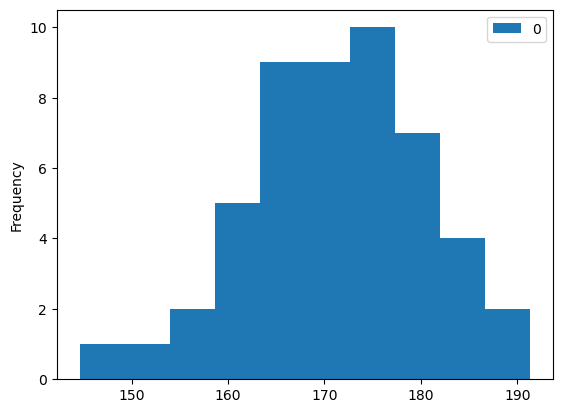

In [18]:
pd.DataFrame(results).plot.hist()

As we can see in the graph above, there is only one peak value, and since the center point of the graph is the average of the array, we can assume that the distribution is normal. 

#### » Plot qqplot(graphical method two) to check the normality 

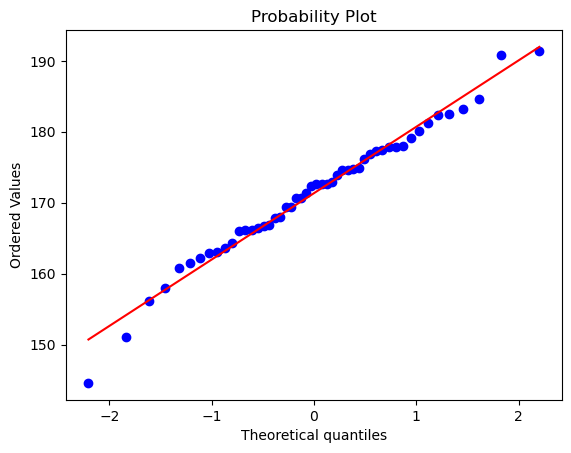

In [19]:
import pylab
stats.probplot(results,dist="norm",plot=pylab)
pylab.show()

The red line is the regression line, and the blue values are more scattered around the red line, so we can say that the distribution is normal.

#### Test method(shapiro-wilks Test)

#### » Use the "shapiro" to get the p value and the calculated value

In [16]:
from scipy.stats import shapiro
shapiro(results) #(statistic of test, p value)

ShapiroResult(statistic=np.float64(0.9842933989870144), pvalue=np.float64(0.7408530415932771))

##### H0: There is no difference between the sample distribution and the theoretical normal distribution.
##### H1: There is "
pvalue is greater than 0.05(alpha value) so H0 is cannot rejected and we can say there is no difference between them and thats mean distribution is normal

### Hypothesis Test

In [22]:
stats.ttest_1samp(results, popmean=170)

TtestResult(statistic=np.float64(1.027927373511743), pvalue=np.float64(0.3090316561712195), df=np.int64(49))

pvalue is lower than 0.05(alpha value) so H0 is rejected and we can say that the average time is different from 170 seconds.

### ! If the Shapiro test result were negative (p-value <0.05, H0 rejected), the normality assumption would be false. Accordingly, a nonparametric one-sample test is performed using “sign_test” for this hypothesis.

#### Non-parametric One Sample Test

In [25]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(results, 170)

(np.float64(4.0), np.float64(0.3222363203575469))